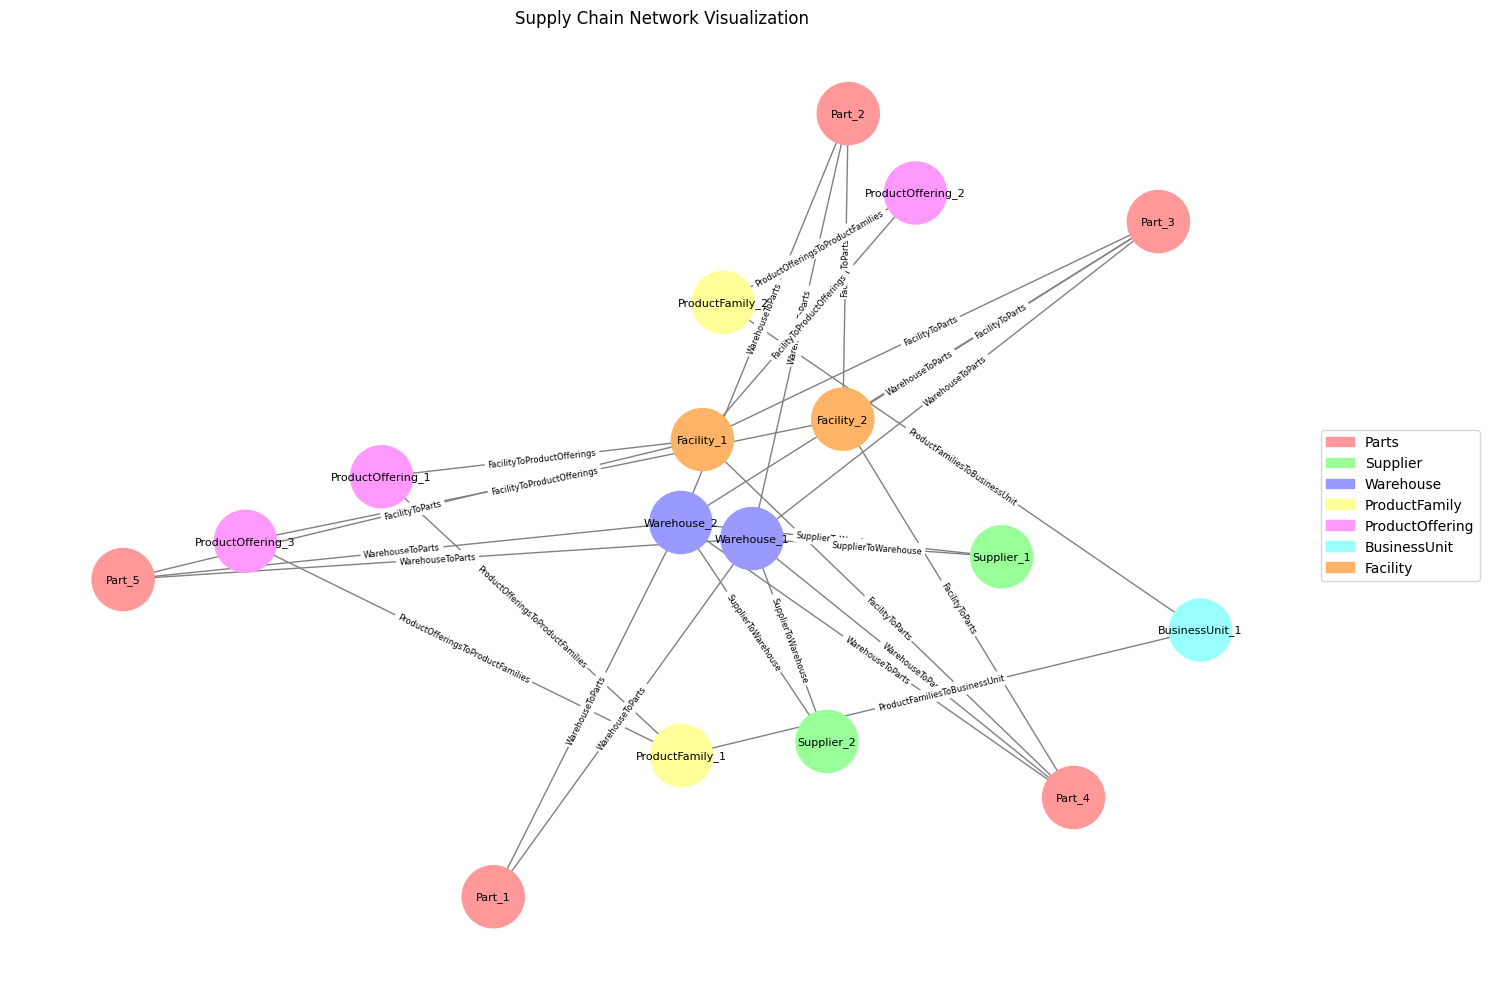

In [1]:
import json
from meaningful_sim import run_simulation, MeaningfulSimulator

# Load schema
with open('../metadata/relations.json', 'r') as f:
    schema = json.load(f)

# Create simulator instance
simulator = MeaningfulSimulator(schema)

# Define nodes per type (using a smaller number for better visualization)
nodes_per_type = {
    "Parts": 5,
    "Facility": 2,
    "Warehouse": 2,
    "Supplier": 2,
    "ProductFamily": 2,
    "ProductOffering": 3,
    "BusinessUnit": 1
}

# Create initial graph
simulator.create_initial_graph(nodes_per_type)

# Visualize initial state
simulator.visualize_current_state()

# Run some updates
simulator.simulate_updates(5)

In [2]:
import requests
import time
import copy

API_URL = "http://localhost:8000"

version = "v11"

def send_bulk_change(data):
    updated_ops = []
    for op in data:
        updated_op = copy.deepcopy(op)
        updated_op["version"] = version
        updated_ops.append(updated_op)
    
    response = requests.post(f"{API_URL}/schema/live/update/bulk", json=updated_ops)
    print(f"Response: {response.json()}")
    time.sleep(1)

# Process each batch of operations
for ops in simulator.get_operations():
    send_bulk_change(ops)

Response: {'status': 'Schema update bulk queued'}
Response: {'status': 'Schema update bulk queued'}
Response: {'status': 'Schema update bulk queued'}
Response: {'status': 'Schema update bulk queued'}
Response: {'status': 'Schema update bulk queued'}
Response: {'status': 'Schema update bulk queued'}
Response: {'status': 'Schema update bulk queued'}
